## ES654 - Prerequisite Test
### Hari Hara Sudhan S
### 22250011

In [ ]:
# pip statements
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [256]:
# imports
from rich.pretty import pprint
import time
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
import pandas as pd

**Qn 1**

For an (n, k) and (k, m) matrix multiplication, 
Number of additions = n * m * (k-1)
Number of multiplications = n * m * k

It is because for each element of the resultant matrix, k multiplications and k-1 additions are performed. And the resultant matrix is of size (n, m).

**Qn 2**

In [ ]:
def mat_mul_list(a, b):
  c = []
  for i in range(n):
    r = []
    for j in range(m):
      s = 0
      for x in range(k):
        s += a[i][x] * b[x][j]
      r.append(s)
    c.append(r.copy())
  return c

def mat_mul_numpy(a, b):
  a_array = np.array(a)
  b_array = np.array(b)
  c_array = np.matmul(a_array, b_array)
  return c_array.tolist()

n_list = [10, 50, 100]
m_list = [5, 25, 100]
k_list = [10, 50, 100]

for i in range(3):
  n = n_list[i]
  m = m_list[i]
  k = k_list[i]
  a = [[i for i in range(k)] for i in range(n)]
  b = [[i for i in range(m)] for i in range(k)]
  
  runtime_list = []
  runtime_np = []

  for j in range(100):  
    st = time.time()
    mat_mul_list(a, b)
    end = time.time()

    runtime_list.append(end - st)
    
    st = time.time()
    mat_mul_numpy(a, b)
    end = time.time()
    
    runtime_np.append(end - st)
  print('n = ', n, ', m = ', m, ', k =', k, ":")
  print("Time using Lists: ", np.mean(runtime_list), '\u00B1', np.std(runtime_list))
  print("Time using Numpy: ", np.mean(runtime_np), '\u00B1', np.std(runtime_np))
  print()


n =  10 , m =  5 , k = 10 :
Time using Lists:  0.00020505428314208983 ± 2.1920065166770418e-05
Time using Numpy:  5.424976348876953e-05 ± 1.286035296549025e-05

n =  50 , m =  25 , k = 50 :
Time using Lists:  0.014696571826934814 ± 0.006154737767395086
Time using Numpy:  0.0005900979042053223 ± 0.000214285192537105

n =  100 , m =  100 , k = 100 :
Time using Lists:  0.3148094391822815 ± 0.1453924286281467
Time using Numpy:  0.004873826503753662 ± 0.003243648160431181



The output using the numpy arrays are faster because the python lists are represented using a pyvar object where each element has the address to the pyobject on the memory. Also, the all the elements of a python lists are not stored in a contigious manned in the memory. Hence, memory access for python lists take more time than a numpy aray where every element of the array is of a fixed size and type and stored in contigious manner.

**Qn 3**

If finding the first highest element takes 1 pass, second highest element takes 2 passes. Then finding the median i.e. n/2th highest element takes n/2 passes.
And each pass looks at n elements.
<br/> 
Hence, time complexity of this solution would be $O(n^2)$.

The below code implements this approach.

In [ ]:
def find_nth_highest(lst, n):
  if(len(lst) == 0):
    return None
  
  l = lst.copy()

  for j in range(0, n):
    highest = None
    for i in l:
      if i == None:
        continue
      
      if highest == None:
        highest = i
      elif highest < i:
        highest = i
    
    l[l.index(highest)] = None
  return highest

def find_median_naive(lst):
  if len(lst) % 2 == 0:
    median = (find_nth_highest(lst, int(len(lst)/2)) + find_nth_highest(lst, int(len(lst)/2) + 1))/2
  else:
    median = find_nth_highest(lst, int(len(lst)/2 + 1))
  return median


A better way to find median is sorting the list and then returning the middle element.

The below function does implements that approach.

In [ ]:
def find_median_sort(lst):
  l = lst.copy()
  l.sort()

  if len(l) % 2 == 0:
    median = (l[int(len(l)/2)] + l[int(len(l)/2)-1] )/2 
  else:
    median = l[int(len(l)/2) ]
  return median

Function to finding median using numpy library

In [ ]:
def find_median_numpy(lst):
  return np.median(lst)

In [ ]:
lst = [i for i in range(1, 20)]

print("Using Naive approach: ",find_median_naive(lst))
print("Using Sorting function: ",find_median_sort(lst))
print("Using Numpy function: ",find_median_numpy(lst))

Using Naive approach:  10
Using Sorting function:  10
Using Numpy function:  10.0


In [ ]:
# For Runtime Calculation

# n_list = [100, 500, 1000, 2000, 3500]
n_list = [100, 500, 1000, 2000, 3500]

for n in n_list:
  lst = [i for i in range(1, n)]
  runtime_naive = []
  runtime_sort = []
  runtime_np = []

  for i in range(30):    
    start = time.time()
    find_median_naive(lst)
    end = time.time()
    runtime_naive.append(end - start)

    start = time.time()
    find_median_sort(lst)
    end = time.time()
    runtime_sort.append(end - start)

    start = time.time()
    find_median_numpy(lst)
    end = time.time()
    runtime_np.append(end - start)

  print("For n = ", n, ":")
  print("Time using Naive approach: ", np.mean(runtime_naive), "\u00B1", np.std(runtime_naive))
  print("Time using Sorting function: ", np.mean(runtime_sort), "\u00B1", np.std(runtime_sort))
  print("Time using Numpy library: ", np.mean(runtime_np), "\u00B1", np.std(runtime_np))
  print()

For n =  100 :
Time using Naive approach:  0.0007181644439697265 ± 0.00016946595596359088
Time using Sorting function:  5.18957773844401e-06 ± 3.600927463174938e-06
Time using Numpy library:  9.814898173014323e-05 ± 0.00012701509472589059

For n =  500 :
Time using Naive approach:  0.017137726147969563 ± 0.0022728762152751875
Time using Sorting function:  2.2196769714355467e-05 ± 1.9636907396325792e-05
Time using Numpy library:  0.0002501328786214193 ± 0.00016084154798319807

For n =  1000 :
Time using Naive approach:  0.06842726866404215 ± 0.00719941411408295
Time using Sorting function:  2.6520093282063802e-05 ± 3.4062349511429922e-06
Time using Numpy library:  0.00029607613881429035 ± 7.73129629161882e-05

For n =  2000 :
Time using Naive approach:  0.2649237553278605 ± 0.007656267037635457
Time using Sorting function:  3.784497578938802e-05 ± 2.9892361578674006e-06
Time using Numpy library:  0.0003435929616292318 ± 4.593939911510389e-05

For n =  3500 :
Time using Naive approach:  

**Qn 4**

The required gradients are 

\begin{align}
  p(x, y) = \frac{δ[x^2y + y^3 sin(x)]}{δx} = 2xy + y^3cos(x)
\end{align}

<br/>
<br/>
\begin{align}
  q(x, y) = \frac{δ[x^2y + y^3 sin(x)]}{δy} =  x^2 + 3y^2sin(x)
\end{align}

$p(1.0, 1.0) = 2.54030230586$
<br/>
$q(1.0, 1.0) = 3.52441295442$
<br/>
<br/>

$p(0.0, 1.0) = 1.0$
<br/>
$q(0.0, 1.0) = 0.0$

**Qn 5**

Gradient using JAX

In [ ]:
from jax import grad
from jax.numpy import sin

def f(x, y):
  return ((x**2)*y) + ((y**3) * sin(x))

x_grad = grad(f, argnums=0)
y_grad = grad(f, argnums=1)

print("p(1.0, 1.0) =", x_grad(1.0, 1.0))
print("q(1.0, 1.0) =", y_grad(1.0, 1.0), "\n")
print("p(0.0, 1.0) =", x_grad(0.0, 1.0))
print("q(0.0, 1.0) =", y_grad(0.0, 1.0))

p(1.0, 1.0) = 2.5403023
q(1.0, 1.0) = 3.5244129 

p(0.0, 1.0) = 1.0
q(0.0, 1.0) = 0.0


The above outputs confirm that the gradient evaluated by my method matches with the one evaluated by the analytical solution.

**Qn 6**

Using sympy to obtain the same gradient

In [ ]:
from sympy import *

x, y = symbols('x y')
exp =  x**2*y + y**3*sin(x)

In [ ]:
diff(exp, x)

In [ ]:
diff(exp, y)

The analytical solutions are verified by using sympy

**Qn 7**

Code to create a nested python dictionary to store the student information

In [ ]:
dic = {}

for i in range(2022, 2024):
  dic1 = {}
  for j in range(1, 4):
    label = "Branch "+ str(j)
    lst = []
    for k in range(1,4):
      d = {
          "roll no.": k,
           "name": "John",
           "marks": [
               {
                   "Maths": 100, "English": 98
               }
           ]
      }
      lst.append(d)
    dic1[label] = lst
  dic[i] = dic1

  pprint(dic)

{
│   2022: {
│   │   'Branch 1': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ],
│   │   'Branch 3': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ]
│   }
}

{
│   2022: {
│   │   'Branch 1': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ],
│   │   'Branch 3': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ]
│   },
│   2023: {
│   │   'Branch 1': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ],
│   │   'Branch 3': [
│   │   │   {'roll no.': 1, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 2, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]},
│   │   │   {'roll no.': 3, 'name': 'John', 'marks': [{'Maths': 100, 'English': 98}]}
│   │   ]
│   }
}

**Qn 8**

Storing student records using classes and objects

In [ ]:
class Student:
  def __init__(self, rollno, name, marks):
    self.name = name
    self.rollno = rollno
    self.marks = marks

class Year:
  def __init__(self, year, branch1, branch2):
    self.branch1 = branch1
    self.branch2 = branch2
    self.year = year

year_lst = []
for i in range(2022, 2027):
  branch1 = [Student(1, "John", {"Math": 20, "Chem": 40}), Student(2, "Peter", {"Math": 40, "Chem": 10})]
  branch2 = [Student(12, "Jarvis", {"Math": 100, "Chem": 95}), Student(13, "Parker", {"Math": 45, "Chem": 15})]

  year_lst.append(Year(i, deepcopy(branch1), deepcopy(branch2)))

In [ ]:
pprint(year_lst)

[
│   <__main__.Year object at 0x7f58ba060100>,
│   <__main__.Year object at 0x7f58ba060640>,
│   <__main__.Year object at 0x7f589209e7f0>,
│   <__main__.Year object at 0x7f58ba060310>,
│   <__main__.Year object at 0x7f58ba060f40>
]

**Qn 9**

Using Matplotlib to plot the functions


In [ ]:
x = np.arange(0.5, 100.5, 0.5)


1. $y=x$

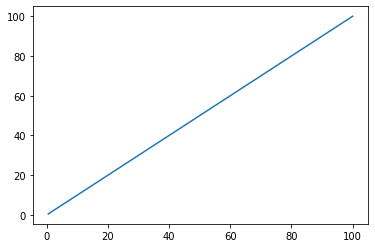

In [ ]:
y = x.copy()

plt.plot(x, y)
plt.show()

2. $y = x^2$

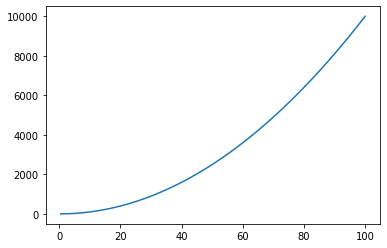

In [ ]:
y = [i**2 for i in x]

plt.plot(x, y)
plt.show()

3. $ y = x^3/100$

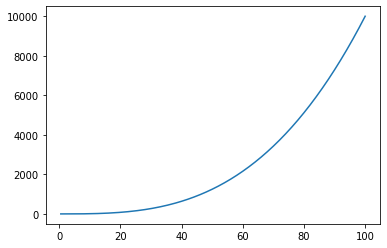

In [ ]:
y = [i**3/100 for i in x]

plt.plot(x, y)
plt.show()

4. $y = sin(x)$

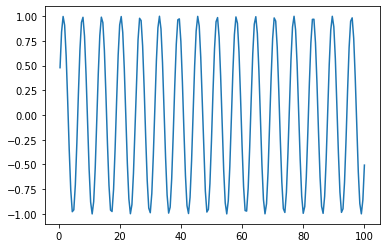

In [ ]:
y = [np.sin(i) for i in x]

plt.plot(x, y)
plt.show()

5. $y = sin(x)/x$

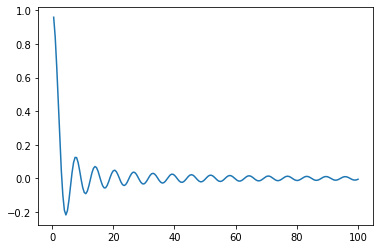

In [257]:
y = [np.sin(i)/i for i in x]

plt.plot(x, y)
plt.show()


6. $y = log(x)$

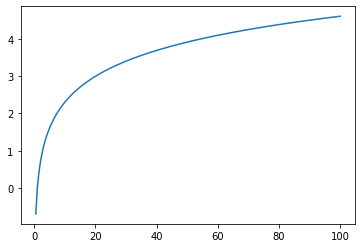

In [ ]:
y = [np.log(i) for i in x]

plt.plot(x, y)
plt.show()

7. $y=e^x$

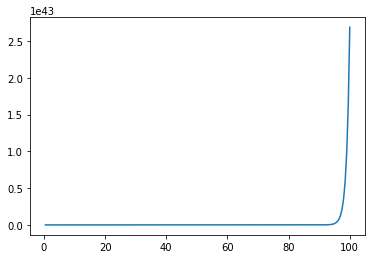

In [ ]:
y = [np.exp(i) for i in x]

plt.plot(x, y)
plt.show()

**Qn 10**

In [ ]:
mat = np.random.uniform(1.0, 2.0, size=(20, 5))
columns = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(mat, columns = columns)
print(df)

           a         b         c         d         e
0   1.701323  1.208371  1.606895  1.815792  1.306475
1   1.636260  1.971792  1.192174  1.900499  1.050661
2   1.895245  1.828903  1.794051  1.235396  1.403852
3   1.125344  1.431639  1.361505  1.042523  1.429107
4   1.981796  1.299395  1.901729  1.102715  1.334620
5   1.388535  1.671501  1.206796  1.469487  1.523763
6   1.802344  1.433310  1.526116  1.298423  1.235936
7   1.325015  1.950360  1.191769  1.409418  1.574920
8   1.397343  1.409063  1.069636  1.444684  1.978733
9   1.339564  1.739260  1.466273  1.759425  1.966344
10  1.885811  1.234355  1.719502  1.496155  1.775758
11  1.435380  1.641430  1.590891  1.846179  1.353385
12  1.476497  1.520957  1.735918  1.641145  1.209187
13  1.398404  1.126187  1.935641  1.427481  1.481091
14  1.264801  1.679208  1.187314  1.693939  1.546398
15  1.375743  1.615829  1.912357  1.800692  1.408106
16  1.186310  1.341751  1.988932  1.790029  1.971408
17  1.534245  1.607613  1.563610  1.630971  1.

In [ ]:
std = df.std()
print(std)

a    0.255525
b    0.256621
c    0.295555
d    0.252360
e    0.278120
dtype: float64


In [ ]:
print("The column with max std deviation is", columns[std.argmax()])

The column with max std deviation is c


In [ ]:
mean = df.mean(1)
print(mean)

0     1.527771
1     1.550277
2     1.631489
3     1.278024
4     1.524051
5     1.452017
6     1.459226
7     1.490296
8     1.459892
9     1.654173
10    1.622316
11    1.573453
12    1.516741
13    1.473761
14    1.474332
15    1.622545
16    1.655686
17    1.611987
18    1.695232
19    1.464956
dtype: float64


In [ ]:
print("The row with lowest mean is", mean.argmin())

The row with lowest mean is 3


**Qn 11**

In [ ]:
# Inserting column f
df['f'] = df.sum(1)

In [ ]:
# Inserting column g

df.loc[df['f'] < 8, 'g'] = 'LT8' 
df.loc[df['f'] >= 8, 'g'] = 'GT8' 

In [ ]:
print(df)

           a         b         c         d         e         f    g
0   1.701323  1.208371  1.606895  1.815792  1.306475  7.638857  LT8
1   1.636260  1.971792  1.192174  1.900499  1.050661  7.751386  LT8
2   1.895245  1.828903  1.794051  1.235396  1.403852  8.157447  GT8
3   1.125344  1.431639  1.361505  1.042523  1.429107  6.390118  LT8
4   1.981796  1.299395  1.901729  1.102715  1.334620  7.620255  LT8
5   1.388535  1.671501  1.206796  1.469487  1.523763  7.260084  LT8
6   1.802344  1.433310  1.526116  1.298423  1.235936  7.296130  LT8
7   1.325015  1.950360  1.191769  1.409418  1.574920  7.451482  LT8
8   1.397343  1.409063  1.069636  1.444684  1.978733  7.299460  LT8
9   1.339564  1.739260  1.466273  1.759425  1.966344  8.270866  GT8
10  1.885811  1.234355  1.719502  1.496155  1.775758  8.111580  GT8
11  1.435380  1.641430  1.590891  1.846179  1.353385  7.867265  LT8
12  1.476497  1.520957  1.735918  1.641145  1.209187  7.583704  LT8
13  1.398404  1.126187  1.935641  1.427481  1.48

In [ ]:
count = len(df[df['g'] == 'LT8'])
print("The number of rows in the dataframe where the value in the column 'g' is 'LT8' is", count)

The number of rows in the dataframe where the value in the column 'g' is 'LT8' is 13


In [ ]:
std_gt = df[df['g'] == 'GT8']['f'].std()
std_lt = df[df['g'] == 'LT8']['f'].std()

print("The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8' is", std_lt)
print("The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8' is", std_gt)

The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8' is 0.35957113738991686
The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8' is 0.14356061697230452


**Qn 12**

Broadcasting describes how python treats two different shapes during an arithmetic operation. In order for broadcasting to work, the individual dimensions are either equal or one.

The below example demonstrates broadcasting.

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([3, 3, 3, 3])

print(a * b)

[ 3  6  9 12]


In [ ]:
a = np.array([1, 2, 3, 4])
b = 3

print(a * b)

[ 3  6  9 12]


Both the above code snippets produce the same output eventhough in the first one both the elements are arrays but in the second one b is a scalar.

Numpy converts this scalar into array of size that matches size of a.

**Qn 13**

Argmin

In [ ]:
def argmin(arr):
  if(len(arr) == 0):
    return -1

  index = 0
  m = arr[0]
  for i, ele in enumerate(arr):
    if ele < m:
      m = ele
      index = i
  return index

In [ ]:
arr = np.array([8000000, 234, 2345, 123, 12341234, 1234, 123, 2345])
print("Output by custom function =", argmin(arr))
print("Output by numpy function =", np.argmin(arr))

Output by custom function = 3
Output by numpy function = 3
